<a href="https://colab.research.google.com/github/SitrakaZuLetzebuerg/IAE_METZ_EXAMPLE/blob/main/EmpiricalFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First, we need to import the necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Next, let's fetch the stock data using Yahoo Finance.
# We will use the 'yfinance' package to download stock data.

# Define the stock ticker symbol (you can change this for any stock)
ticker = "AAPL"  # Apple Inc.
# Define the period for which we want the stock data, for example, the last 5 years
start_date = "2018-01-01"
end_date = "2023-01-01"
# Fetch the stock data using yfinance
stock_data = yf.download(ticker, start=start_date, end=end_date)
# Display the first few rows of the data to understand its structure
stock_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600
2018-01-03,40.472778,41.017963,40.409333,40.543277,118071600
2018-01-04,40.660782,40.764179,40.437540,40.545634,89738400
2018-01-05,41.123718,41.210664,40.665483,40.757130,94640000
2018-01-08,40.970978,41.267067,40.872278,40.970978,82271200


In [3]:
# Calculate daily returns using the 'Close' price
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Display the first few rows of the DataFrame to see the calculated returns
stock_data[['Close', 'Daily_Returns']].head()


Price,Close,Daily_Returns
Ticker,AAPL,
Date,,
2018-01-02,40.479839,NaN
2018-01-03,40.472778,NaN
2018-01-04,40.660782,NaN
2018-01-05,41.123718,NaN
2018-01-08,40.970978,NaN


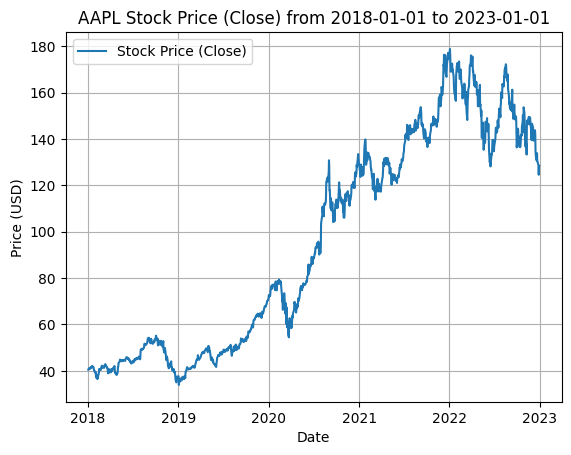

In [5]:
# Plot the stock's closing price
#plt.figure(figsize=(12,6))
plt.figure()
plt.plot(stock_data['Close'], label='Stock Price (Close)')
plt.title(f'{ticker} Stock Price (Close) from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend() # JONATHAN
plt.grid(True)
plt.show()

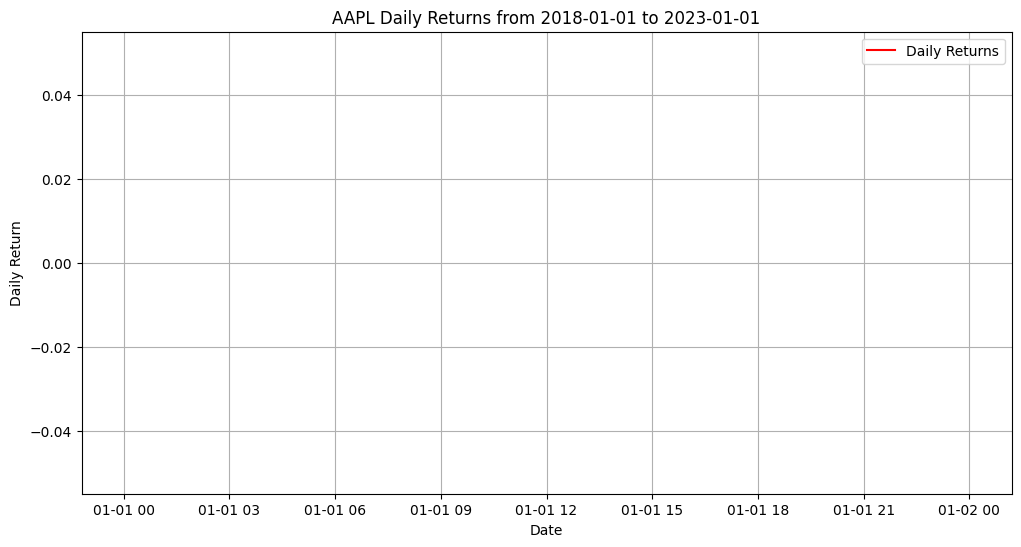

In [6]:
# Plot the daily returns
plt.figure(figsize=(12,6))
plt.plot(stock_data['Daily_Returns'], label='Daily Returns', color='red')
plt.title(f'{ticker} Daily Returns from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Calculate basic statistics for the daily returns
mean_return = stock_data['Daily_Returns'].mean()
std_dev_return = stock_data['Daily_Returns'].std()
cumulative_return = (1 + stock_data['Daily_Returns']).prod() - 1

# Print the results
print(f"Mean Daily Return: {mean_return:.5f}")
print(f"Standard Deviation of Daily Returns: {std_dev_return:.5f}")
print(f"Cumulative Return over the period: {cumulative_return:.5f}")


Mean Daily Return: nan
Standard Deviation of Daily Returns: nan
Cumulative Return over the period: 0.00000


In [8]:
# Assume a risk-free rate of 0% for simplicity
risk_free_rate = 0

# Calculate the Sharpe Ratio
sharpe_ratio = (mean_return - risk_free_rate) / std_dev_return

# Print the Sharpe Ratio
print(f"Sharpe Ratio: {sharpe_ratio:.5f}")


Sharpe Ratio: nan


# JPMorgan 175 Millions de dollars

In [10]:
np.random.seed(42)
n_simulations = 10_000
risk_free_rate = 0.02 # tx sans risque 2%

In [21]:
# Gen de volatilité
mean_returns = np.random.uniform(0.05, 0.2,n_simulations)
volatilities = np.random.uniform(0.1,0.35, n_simulations)

In [12]:
# SHARPE RATIO
sharpe_ratios = (mean_returns- risk_free_rate) / volatilities

In [15]:
print(sharpe_ratios)

[0.25521613 0.30452819 0.34518715 ... 0.4322624  0.55858289 0.44558672]


In [22]:
best_index = np.argmax(sharpe_ratios)
best_sr = sharpe_ratios[best_index]
best_return = mean_returns[best_index]
best_volatitily = volatilities[best_index]